In [1]:
#정규 방정식

import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [5]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.11770001],
       [2.93241952]])

In [7]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.11770001],
       [9.98253905]])

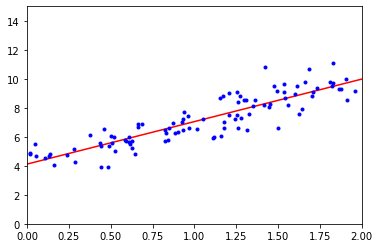

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[4.11770001],
       [9.98253905]])

In [15]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.11770001],
       [2.93241952]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[4.11770001],
       [2.93241952]])